In [1]:
import nibabel as nib
import numpy as np
import os

labs = True
if labs:
    # Define the path to the tractograms to evaluate
    results_path = "/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0"
else:
    results_path = "/mnt/d/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0"
optimized_path = os.path.join(results_path, "track.trk")
model_path = os.path.join(results_path, "tracer_decoded_restored.trk")
original_path = os.path.join(results_path, "tracer_streamlines_restored.trk")

## **Create Connectomes**

In [2]:
import glob

# Retrieve (GLOB) files
def glob_files(PATH_NAME, file_format):
    INPUT_FILES = []
    for file in glob.glob(os.path.join(PATH_NAME, os.path.join("**", "*.{}".format(file_format))), recursive=True):
        INPUT_FILES.append(file)
    return INPUT_FILES

# Load all csv files in results_path
csv_files = glob_files(results_path, "csv")

# Separate to model, optimized and tracer
model_csv = [file for file in csv_files if "model" in file]
optimized_csv = [file for file in csv_files if "optimized" in file]
tracer_csv = [file for file in csv_files if "tracer" in file]

In [3]:
# Function to create the dictionary and load the csv files
def load_csv(csv_files):
    
    # Create a dictionary
    csv_dict = {}

    # Loop over each csv file
    for file in csv_files:
        # Extract the atlas name
        atlas_name = file.split(os.sep)[-1].replace(".csv", "").split("_")[-1]
        # Add the atlas name and csv file to the dictionary
        csv_dict[atlas_name] = file

    # Return the dictionary
    return csv_dict

model_csv_dict = load_csv(model_csv)
optimized_csv_dict = load_csv(optimized_csv)
tracer_csv_dict = load_csv(tracer_csv)

print("Model csv dictionary: {}".format(model_csv_dict))
print("Optimized csv dictionary: {}".format(optimized_csv_dict))
print("Tracer csv dictionary: {}".format(tracer_csv_dict))

Model csv dictionary: {'MBCA': '/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/model_MBCA.csv', 'MBM': '/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/model_MBM.csv'}
Optimized csv dictionary: {'MBCA': '/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/optimized_MBCA.csv', 'MBM': '/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/optimized_MBM.csv'}
Tracer csv dictionary: {'MBCA': '/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/tracer_MBCA.csv', 'MBM': '/media/hsa22/Expansion/deeplearning_test/test/test/brain_A6Vb-R01_0104-TT72/regression_points_directions/batch_0/tracer_MBM.csv'}


In [4]:
# Function to flip the matrix
def flip_matrix(matrix):

    # Flip the matrix
    flipped_matrix = np.flip(matrix, axis=0)

    # Flip the matrix again
    flipped_matrix = np.flip(flipped_matrix, axis=1)

    # Add the original to the flipped
    flipped_matrix = flipped_matrix + matrix

    # Return the flipped matrix
    return flipped_matrix

# Function to load the connectomes
def load_connectomes(csv_dict):

    # Create a dictionary
    connectomes = {}
    symmetrized_connectomes = {}

    # Loop over each csv file
    for atlas_name, file in csv_dict.items():
        # Read the csv file
        connectome = np.genfromtxt(file, delimiter=',')
        # Log the connectome
        connectomes[atlas_name] = np.log(connectome + 1)
        # Symmetrize the connectome
        symmetrized_connectomes[atlas_name] = flip_matrix(connectomes[atlas_name])
        # Print the shape of the connectome
        print("Connectome shape for {}: {}".format(atlas_name, connectomes[atlas_name].shape))

    # Return the dictionary
    return connectomes, symmetrized_connectomes

model_connectomes, model_symmetrized_connectomes = load_connectomes(model_csv_dict)
optimized_connectomes, optimized_symmetrized_connectomes = load_connectomes(optimized_csv_dict)
tracer_connectomes, tracer_symmetrized_connectomes = load_connectomes(tracer_csv_dict)

Connectome shape for MBCA: (135, 135)
Connectome shape for MBM: (135, 135)
Connectome shape for MBCA: (135, 135)
Connectome shape for MBM: (135, 135)
Connectome shape for MBCA: (135, 135)
Connectome shape for MBM: (135, 135)


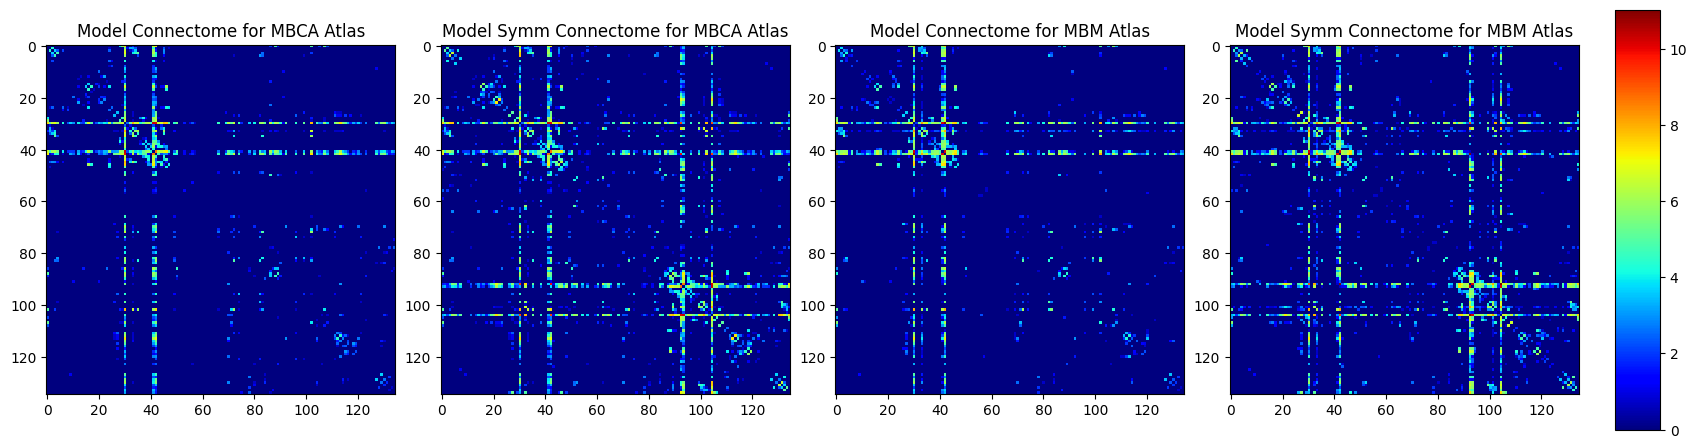

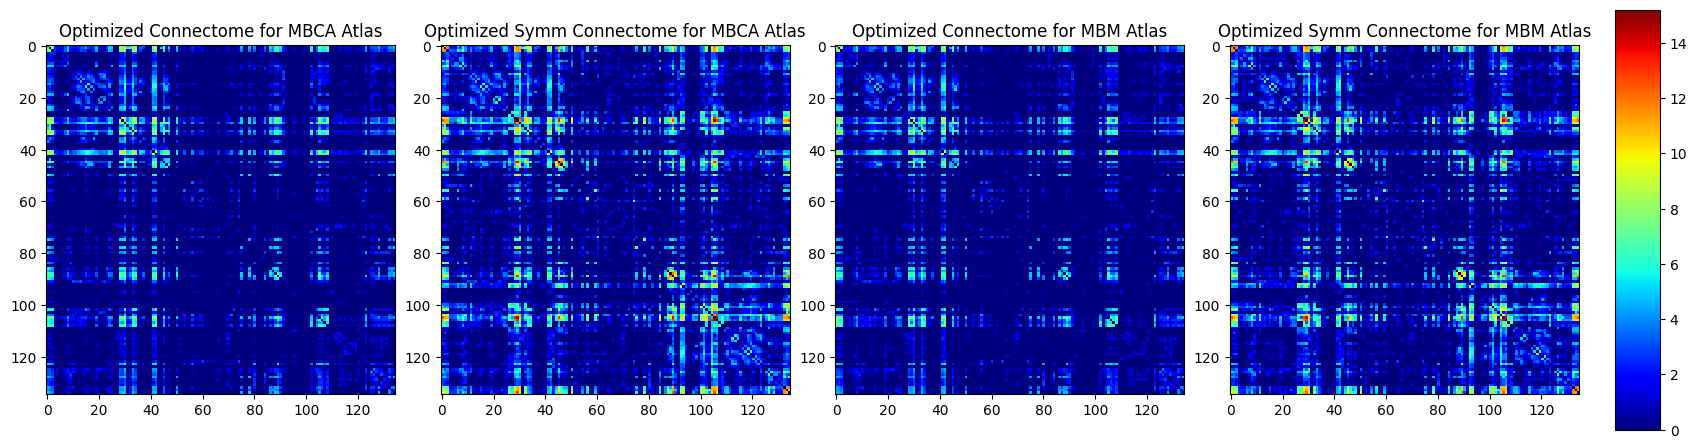

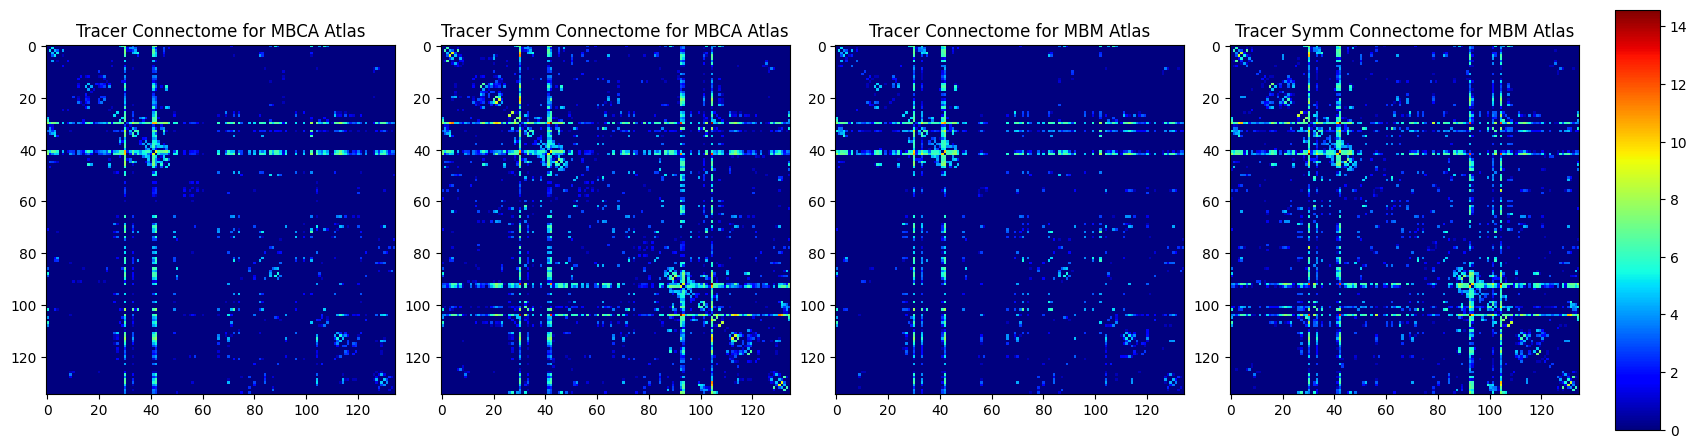

In [5]:
import matplotlib.pyplot as plt

def plot_connectomes_row(atlas_name, connectome_data, symmetrized_connectome_data, title_prefix):
    fig, axs = plt.subplots(1, 4, figsize=(18, 6))

    # Determine shared colormap normalization across plots for consistent visualization within this row
    vmin = min(np.min(connectome_data["MBCA"]), np.min(symmetrized_connectome_data["MBCA"]),
               np.min(connectome_data["MBM"]), np.min(symmetrized_connectome_data["MBM"]))
    vmax = max(np.max(connectome_data["MBCA"]), np.max(symmetrized_connectome_data["MBCA"]),
               np.max(connectome_data["MBM"]), np.max(symmetrized_connectome_data["MBM"]))

    # Helper function to plot images
    def plot_image(ax, data, title):
        im = ax.imshow(data, interpolation='nearest', aspect='equal', cmap="jet", vmin=vmin, vmax=vmax)
        ax.set_title(title)
        return im

    # MBCA Atlas
    im1 = plot_image(axs[0], connectome_data["MBCA"], f"{title_prefix} Connectome for MBCA Atlas")
    im2 = plot_image(axs[1], symmetrized_connectome_data["MBCA"], f"{title_prefix} Symm Connectome for MBCA Atlas")

    # MBM Atlas
    im3 = plot_image(axs[2], connectome_data["MBM"], f"{title_prefix} Connectome for MBM Atlas")
    im4 = plot_image(axs[3], symmetrized_connectome_data["MBM"], f"{title_prefix} Symm Connectome for MBM Atlas")

    # Adjust layout
    fig.tight_layout()
    fig.subplots_adjust(right=0.88)

    # Add colorbar using the last image instance
    cbar_ax = fig.add_axes([0.9, 0.15, 0.025, 0.7])
    fig.colorbar(im4, cax=cbar_ax, orientation='vertical')
    plt.show()

# Plot for each model
plot_connectomes_row("MBCA", model_connectomes, model_symmetrized_connectomes, "Model")
plot_connectomes_row("MBCA", optimized_connectomes, optimized_symmetrized_connectomes, "Optimized")
plot_connectomes_row("MBCA", tracer_connectomes, tracer_symmetrized_connectomes, "Tracer")


## **Graph Theory Stuff**

In [7]:
import networkx as nx

# Function to create a graph for every connectome and remove self-loops
def create_graph(connectome_data, symmetrized_connectome_data):

    # Create a dictionary
    graphs = {}
    symm_graphs = {}

    # Loop over each connectome
    for atlas_name, connectome in connectome_data.items():
        # Create a graph
        graph = nx.DiGraph(connectome)
        # Remove self-loops
        graph.remove_edges_from(nx.selfloop_edges(graph))
        # Add the graph to the dictionary
        graphs[atlas_name] = graph

    # Loop over each symmetrized connectome
    for atlas_name, symmetrized_connectome in symmetrized_connectome_data.items():
        # Create a graph
        graph = nx.DiGraph(symmetrized_connectome)
        # Remove self-loops
        graph.remove_edges_from(nx.selfloop_edges(graph))
        # Add the graph to the dictionary
        symm_graphs[atlas_name] = graph

    # Return the dictionary
    return graphs, symm_graphs

model_graphs, model_symm_graphs = create_graph(model_connectomes, model_symmetrized_connectomes)
optimized_graphs, optimized_symm_graphs = create_graph(optimized_connectomes, optimized_symmetrized_connectomes)
tracer_graphs, tracer_symm_graphs = create_graph(tracer_connectomes, tracer_symmetrized_connectomes)


#### **Graph Density**
**Defintion**: A graph's density is the ratio between the number of edges and the total number of possible edges.

In [9]:
# Compute the density of the graphs
def compute_density(graphs):

    # Create a dictionary
    density = {}

    # Loop over each graph
    for atlas_name, graph in graphs.items():
        # Compute the density
        density[atlas_name] = nx.density(graph)

    # Return the dictionary
    return density

# Compute the density of the graphs
model_density = compute_density(model_graphs)
optimized_density = compute_density(optimized_graphs)
tracer_density = compute_density(tracer_graphs)

# Compute the density of the symmetrized graphs
model_symm_density = compute_density(model_symm_graphs)
optimized_symm_density = compute_density(optimized_symm_graphs)
tracer_symm_density = compute_density(tracer_symm_graphs)

# Print the density of the graphs
print("Model density: {}".format(model_density))
print("Optimized density: {}".format(optimized_density))
print("Tracer density: {}".format(tracer_density))

print("----------------------------------------")

print("Model symmetrized density: {}".format(model_symm_density))
print("Optimized symmetrized density: {}".format(optimized_symm_density))
print("Tracer symmetrized density: {}".format(tracer_symm_density))

Model density: {'MBCA': 0.06025428413488115, 'MBM': 0.0626865671641791}
Optimized density: {'MBCA': 0.26235489220563846, 'MBM': 0.24566058595909343}
Tracer density: {'MBCA': 0.07595356550580432, 'MBM': 0.07694859038142621}
----------------------------------------
Model symmetrized density: {'MBCA': 0.11586511885019347, 'MBM': 0.12128247650635711}
Optimized symmetrized density: {'MBCA': 0.4451077943615257, 'MBM': 0.4231066887783306}
Tracer symmetrized density: {'MBCA': 0.14472084024322832, 'MBM': 0.14671088999447207}


#### **Nodal Strength and Degree**
**Defintion**: A graph's density is the ratio between the number of edges and the total number of possible edges.

In [12]:
# Compute the nodal degree and strength of the graphs
def compute_nodal_degree_and_strength(graphs):
    
    nodal_degree = {}
    nodal_strength = {}
    nodal_mean_strength = {}
    mean_degrees = {}
    mean_strengths = {}

    for atlas_name, graph in graphs.items():
        # Compute the degree
        nodal_degree[atlas_name] = dict(graph.degree())

        # Compute the strength
        nodal_strength[atlas_name] = dict(nx.degree(graph, weight="weight"))

        # Normalize the strength
        max_strength = np.max(list(nodal_strength[atlas_name].values()))
        nodal_mean_strength[atlas_name] = {k: v / max_strength if max_strength != 0 else 0 for k, v in nodal_strength[atlas_name].items()}

        # Compute mean degree and strength
        mean_degrees[atlas_name] = np.mean(list(nodal_degree[atlas_name].values()))
        mean_strengths[atlas_name] = np.mean(list(nodal_strength[atlas_name].values()))

        # Add as attributes to the graph
        nx.set_node_attributes(graph, nodal_degree[atlas_name], "degree")
        nx.set_node_attributes(graph, nodal_mean_strength[atlas_name], "strength_normalized")

    return nodal_degree, nodal_strength, nodal_mean_strength, mean_degrees, mean_strengths


# Compute the stuff from the function above
(model_nodal_degree, model_nodal_strength, model_nodal_mean_strength, 
 model_mean_degrees, model_mean_strengths) = compute_nodal_degree_and_strength(model_graphs)
(optimized_nodal_degree, optimized_nodal_strength, optimized_nodal_mean_strength, 
 optimized_mean_degrees, optimized_mean_strengths) = compute_nodal_degree_and_strength(optimized_graphs)
(tracer_nodal_degree, tracer_nodal_strength, tracer_nodal_mean_strength,
    tracer_mean_degrees, tracer_mean_strengths) = compute_nodal_degree_and_strength(tracer_graphs)

# Compute the stuff from the function above - symmetrized
(model_symm_nodal_degree, model_symm_nodal_strength, model_symm_nodal_mean_strength, 
 model_symm_mean_degrees, model_symm_mean_strengths) = compute_nodal_degree_and_strength(model_symm_graphs)
(optimized_symm_nodal_degree, optimized_symm_nodal_strength, optimized_symm_nodal_mean_strength,
    optimized_symm_mean_degrees, optimized_symm_mean_strengths) = compute_nodal_degree_and_strength(optimized_symm_graphs)
(tracer_symm_nodal_degree, tracer_symm_nodal_strength, tracer_symm_nodal_mean_strength,
    tracer_symm_mean_degrees, tracer_symm_mean_strengths) = compute_nodal_degree_and_strength(tracer_symm_graphs)

# Print the mean degrees and strengths
print("Model mean degrees: {}".format(model_mean_degrees))
print("Optimized mean degrees: {}".format(optimized_mean_degrees))
print("Tracer mean degrees: {}".format(tracer_mean_degrees))

print("----------------------------------------")

print("Model mean strengths: {}".format(model_mean_strengths))
print("Optimized mean strengths: {}".format(optimized_mean_strengths))
print("Tracer mean strengths: {}".format(tracer_mean_strengths))

Model mean degrees: {'MBCA': 16.14814814814815, 'MBM': 16.8}
Optimized mean degrees: {'MBCA': 70.31111111111112, 'MBM': 65.83703703703704}
Tracer mean degrees: {'MBCA': 20.355555555555554, 'MBM': 20.622222222222224}
----------------------------------------
Model mean strengths: {'MBCA': 50.220400162860244, 'MBM': 53.991392082500994}
Optimized mean strengths: {'MBCA': 172.38661769046413, 'MBM': 162.96927453059945}
Tracer mean strengths: {'MBCA': 68.57718169160944, 'MBM': 71.63150872164167}


In [13]:
# Compute closeness, betweenness and eigenvector centrality
def compute_centrality(graphs):

    # Create a dictionary
    closeness_centrality = {}
    betweenness_centrality = {}
    eigenvector_centrality = {}

    # Loop over each graph
    for atlas_name, graph in graphs.items():

        # Compute a distance dictionary
        graph_distance = {(e1, e2): 1 / abs(weight) for e1, e2, weight in graph.edges(data='weight')}

        # Add the distance dictionary to the graph
        nx.set_edge_attributes(graph, graph_distance, "distance")

        # Compute the closeness centrality
        closeness_centrality[atlas_name] = nx.closeness_centrality(graph, distance="distance")

        # Compute the betweenness centrality
        betweenness_centrality[atlas_name] = nx.betweenness_centrality(graph)

        # Compute the eigenvector centrality
        eigenvector_centrality[atlas_name] = nx.eigenvector_centrality(graph)

        # Add as attributes to the graph
        nx.set_node_attributes(graph, closeness_centrality[atlas_name], "closeness")
        nx.set_node_attributes(graph, betweenness_centrality[atlas_name], "betweenness")
        nx.set_node_attributes(graph, eigenvector_centrality[atlas_name], "eigenvector")

    # Return the dictionary
    return closeness_centrality, betweenness_centrality, eigenvector_centrality

# Compute the stuff from the function above
(model_closeness_centrality, model_betweenness_centrality, 
 model_eigenvector_centrality) = compute_centrality(model_graphs)
(optimized_closeness_centrality, optimized_betweenness_centrality, 
 optimized_eigenvector_centrality) = compute_centrality(optimized_graphs)
(tracer_closeness_centrality, tracer_betweenness_centrality, 
 tracer_eigenvector_centrality) = compute_centrality(tracer_graphs)

# Compute the stuff from the function above - symmetrized
(model_symm_closeness_centrality, model_symm_betweenness_centrality, 
 model_symm_eigenvector_centrality) = compute_centrality(model_symm_graphs)
(optimized_symm_closeness_centrality, optimized_symm_betweenness_centrality,
    optimized_symm_eigenvector_centrality) = compute_centrality(optimized_symm_graphs)
(tracer_symm_closeness_centrality, tracer_symm_betweenness_centrality,
    tracer_symm_eigenvector_centrality) = compute_centrality(tracer_symm_graphs)

In [21]:
# Compute the page rank
def compute_page_rank(graphs):

    # Create a dictionary
    page_rank = {}

    # Loop over each graph
    for atlas_name, graph in graphs.items():
        # Compute the page rank
        page_rank[atlas_name] = nx.pagerank(graph)

        # Add as attributes to the graph
        nx.set_node_attributes(graph, page_rank[atlas_name], "page_rank")

    # Return the dictionary
    return page_rank

# Compute the stuff from the function above
model_page_rank = compute_page_rank(model_graphs)
optimized_page_rank = compute_page_rank(optimized_graphs)
tracer_page_rank = compute_page_rank(tracer_graphs)

# Compute the stuff from the function above - symmetrized
model_symm_page_rank = compute_page_rank(model_symm_graphs)
optimized_symm_page_rank = compute_page_rank(optimized_symm_graphs)
tracer_symm_page_rank = compute_page_rank(tracer_symm_graphs)

/tmp/ipykernel_1269994/3936868011.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(model_closeness_centrality["MBCA"].values()), label="Model")
/tmp/ipykernel_1269994/3936868011.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(optimized_closeness_centrality["MBCA"].values()), lab

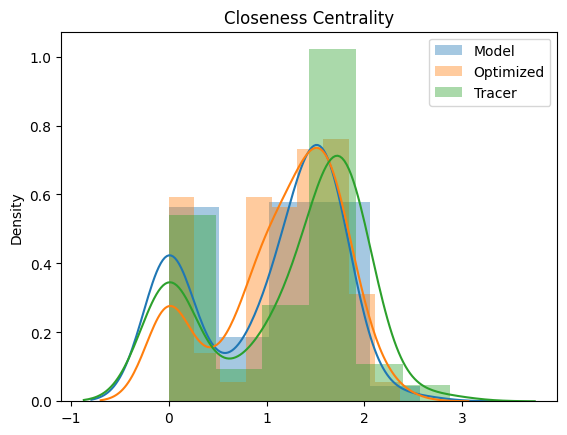

In [19]:
import seaborn as sns

# Make a histogram of the centrality measures
sns.distplot(list(model_closeness_centrality["MBCA"].values()), label="Model")
sns.distplot(list(optimized_closeness_centrality["MBCA"].values()), label="Optimized")
sns.distplot(list(tracer_closeness_centrality["MBCA"].values()), label="Tracer")
plt.legend()
plt.title("Closeness Centrality")
plt.show()

/tmp/ipykernel_1269994/3090975331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(model_betweenness_centrality["MBCA"].values()), label="Model")
/tmp/ipykernel_1269994/3090975331.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(optimized_betweenness_centrality["MBCA"].values()),

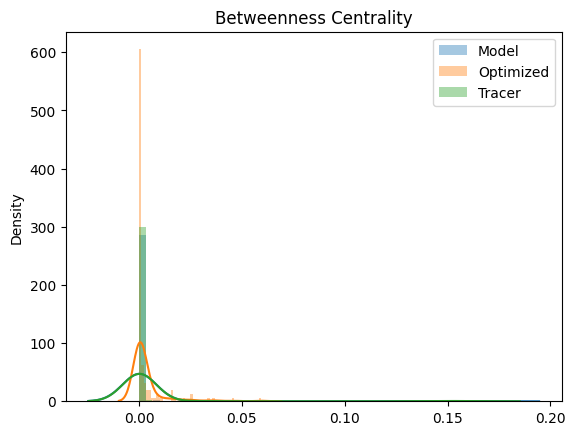

In [18]:
# Make a histogram of the betweenness centrality
sns.distplot(list(model_betweenness_centrality["MBCA"].values()), label="Model")
sns.distplot(list(optimized_betweenness_centrality["MBCA"].values()), label="Optimized")
sns.distplot(list(tracer_betweenness_centrality["MBCA"].values()), label="Tracer")
plt.legend()
plt.title("Betweenness Centrality")
plt.show()

/tmp/ipykernel_1269994/1898206211.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(model_eigenvector_centrality["MBCA"].values()), label="Model")
/tmp/ipykernel_1269994/1898206211.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(optimized_eigenvector_centrality["MBCA"].values()),

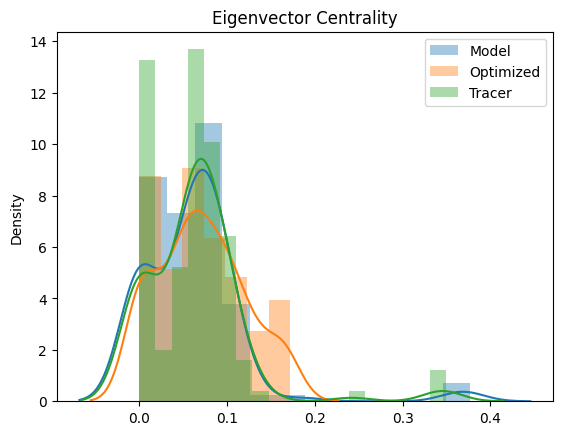

In [20]:
# Make a histogram of the eigenvector centrality
sns.distplot(list(model_eigenvector_centrality["MBCA"].values()), label="Model")
sns.distplot(list(optimized_eigenvector_centrality["MBCA"].values()), label="Optimized")
sns.distplot(list(tracer_eigenvector_centrality["MBCA"].values()), label="Tracer")
plt.legend()
plt.title("Eigenvector Centrality")
plt.show()

/tmp/ipykernel_1269994/1888619364.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(model_page_rank["MBCA"].values()), label="Model")
/tmp/ipykernel_1269994/1888619364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(optimized_page_rank["MBCA"].values()), label="Optimized")
/tmp/i

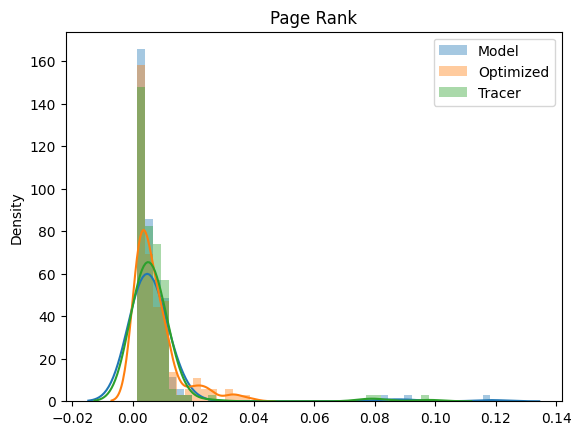

In [22]:
# Make a histogram of the page rank
sns.distplot(list(model_page_rank["MBCA"].values()), label="Model")
sns.distplot(list(optimized_page_rank["MBCA"].values()), label="Optimized")
sns.distplot(list(tracer_page_rank["MBCA"].values()), label="Tracer")
plt.legend()
plt.title("Page Rank")
plt.show()

#### **Path Length**
**Defintion**: A graph's density is the ratio between the number of edges and the total number of possible edges.

In [24]:
# Define the dijkstra function
def dijkstra(graph, source, target):
    # Compute the shortest path
    shortest_path = nx.dijkstra_path(graph, source, target, weight="distance")
    # Compute the shortest path length
    shortest_path_length = nx.dijkstra_path_length(graph, source, target, weight="distance")
    # Return the shortest path and shortest path length
    return shortest_path, shortest_path_length

# Define the function to compute the shortest path and shortest path length
def compute_shortest_path_and_length(graphs):

    # Create a dictionary
    shortest_path = {}
    shortest_path_length = {}

    # Loop over each graph
    for atlas_name, graph in graphs.items():
        # Compute the shortest path and shortest path length
        shortest_path[atlas_name], shortest_path_length[atlas_name] = dijkstra(graph, 0, 1)

    # Return the dictionary
    return shortest_path, shortest_path_length

# Compute the stuff from the function above
model_shortest_path, model_shortest_path_length = compute_shortest_path_and_length(model_graphs)
optimized_shortest_path, optimized_shortest_path_length = compute_shortest_path_and_length(optimized_graphs)
tracer_shortest_path, tracer_shortest_path_length = compute_shortest_path_and_length(tracer_graphs)

# Compute the stuff from the function above - symmetrized
model_symm_shortest_path, model_symm_shortest_path_length = compute_shortest_path_and_length(model_symm_graphs)
optimized_symm_shortest_path, optimized_symm_shortest_path_length = compute_shortest_path_and_length(optimized_symm_graphs)
tracer_symm_shortest_path, tracer_symm_shortest_path_length = compute_shortest_path_and_length(tracer_symm_graphs)

# Print the shortest path and shortest path length
print("Model shortest path: {}".format(model_shortest_path))
print("Optimized shortest path: {}".format(optimized_shortest_path))
print("Tracer shortest path: {}".format(tracer_shortest_path))

print("----------------------------------------")

print("Model shortest path length: {}".format(model_shortest_path_length))
print("Optimized shortest path length: {}".format(optimized_shortest_path_length))
print("Tracer shortest path length: {}".format(tracer_shortest_path_length))

Model shortest path: {'MBCA': [0, 30, 1], 'MBM': [0, 30, 1]}
Optimized shortest path: {'MBCA': [0, 1], 'MBM': [0, 1]}
Tracer shortest path: {'MBCA': [0, 30, 1], 'MBM': [0, 42, 1]}
----------------------------------------
Model shortest path length: {'MBCA': 0.32541895671558835, 'MBM': 0.3282425011570894}
Optimized shortest path length: {'MBCA': 0.12294254289874777, 'MBM': 0.12259283174648189}
Tracer shortest path length: {'MBCA': 0.30497240873360065, 'MBM': 0.307492955264463}


#### **Modularity, Assortativity, Clustering Coeff, Minimum Spanning Tree**
**Defintion**: A graph's density is the ratio between the number of edges and the total number of possible edges.

In [25]:
# Modularity
def compute_modularity(graphs):

    # Create a dictionary
    modularity = {}

    # Loop over each graph
    for atlas_name, graph in graphs.items():
        # Compute the modularity
        modularity[atlas_name] = nx.algorithms.community.modularity_max.greedy_modularity_communities(graph)

        # Add as attributes to the graph
        nx.set_node_attributes(graph, modularity[atlas_name], "modularity")

    # Return the dictionary
    return modularity

# Compute the stuff from the function above
model_modularity = compute_modularity(model_graphs)
optimized_modularity = compute_modularity(optimized_graphs)
tracer_modularity = compute_modularity(tracer_graphs)

# Compute the stuff from the function above - symmetrized
model_symm_modularity = compute_modularity(model_symm_graphs)
optimized_symm_modularity = compute_modularity(optimized_symm_graphs)
tracer_symm_modularity = compute_modularity(tracer_symm_graphs)

# Print the modularity
print("Model modularity: {}".format(model_modularity))
print("Optimized modularity: {}".format(optimized_modularity))
print("Tracer modularity: {}".format(tracer_modularity))

print("----------------------------------------")

print("Model symmetrized modularity: {}".format(model_symm_modularity))
print("Optimized symmetrized modularity: {}".format(optimized_symm_modularity))
print("Tracer symmetrized modularity: {}".format(tracer_symm_modularity))

Model modularity: {'MBCA': [frozenset({1, 66, 2, 3, 4, 6, 71, 72, 8, 74, 82, 83, 24, 25, 26, 27, 96, 32, 33, 99, 34, 35, 102, 45, 111, 49, 121}), frozenset({129, 130, 131, 70, 9, 80, 84, 92, 120, 104, 106, 42, 112, 113, 114, 115, 116, 53, 118, 119, 56, 123, 127}), frozenset({0, 128, 132, 133, 134, 75, 14, 78, 17, 18, 86, 23, 88, 87, 89, 90, 29, 105, 41, 107, 108, 50}), frozenset({69, 10, 12, 13, 15, 16, 19, 20, 21, 22, 55, 117, 57, 91, 30}), frozenset({36, 37, 38, 39, 40, 43, 44, 46, 47, 28, 31}), frozenset({5}), frozenset({7}), frozenset({11}), frozenset({48}), frozenset({51}), frozenset({52}), frozenset({54}), frozenset({58}), frozenset({59}), frozenset({60}), frozenset({61}), frozenset({62}), frozenset({63}), frozenset({64}), frozenset({65}), frozenset({67}), frozenset({68}), frozenset({73}), frozenset({76}), frozenset({77}), frozenset({79}), frozenset({81}), frozenset({85}), frozenset({93}), frozenset({94}), frozenset({95}), frozenset({97}), frozenset({98}), frozenset({100}), froze

In [ ]:
# Find modularity communities
def find_modularity_communities(graphs):

    # Create a dictionary
    modularity_communities = {}

    # Loop over each graph
    for atlas_name, graph in graphs.items():
        # Compute the modularity
        modularity_communities[atlas_name] = nx.algorithms.community.modularity_max.greedy_modularity_communities(graph)

    # Return the dictionary
    return modularity_communities

https://nbviewer.org/github/multinetlab-amsterdam/network_TDA_tutorial/blob/main/1-network_analysis.ipynb
https://github.com/multinetlab-amsterdam/network_TDA_tutorial/tree/v1.0